# Exploratory Data Analysis: Philadelphia-Housing

### Before Data preprocessing:

In [1]:
#import statements
import pandas as pd 
import numpy as np 
import pickle
import seaborn as sns
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)

# import packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

import pickle
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://opendata-downloads.s3.amazonaws.com/opa_properties_public.csv'
Data = pd.read_csv(url)
print(Data.shape)
Data.head()

(581202, 78)


,objectid,assessment_date,basements,beginning_point,book_and_page,building_code,building_code_description,category_code,category_code_description,census_tract,central_air,cross_reference,date_exterior_condition,depth,exempt_building,exempt_land,exterior_condition,fireplaces,frontage,fuel,garage_spaces,garage_type,general_construction,geographic_ward,homestead_exemption,house_extension,house_number,interior_condition,location,mailing_address_1,mailing_address_2,mailing_care_of,mailing_city_state,mailing_street,mailing_zip,market_value,market_value_date,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,off_street_open,other_building,owner_1,owner_2,parcel_number,parcel_shape,quality_grade,recording_date,registry_number,sale_date,sale_price,separate_utilities,sewer,site_type,state_code,street_code,street_designation,street_direction,street_name,suffix,taxable_building,taxable_land,topography,total_area,total_livable_area,type_heater,unfinished,unit,utility,view_type,year_built,year_built_estimate,zip_code,zoning,pin,lat,lng
0,103580882,NaN,A,SWC BROAD & FITZWATER STS,53950012.0,SC,VACANT LAND COMMER < ACRE,1,Single Family,NaN,Y,NaN,NaN,48.0,NaN,NaN,1.0,NaN,18.0,NaN,2.0,1.0,B,NaN,NaN,NaN,742,1.0,742 S BROAD ST,UNIT#9,NaN,NaN,PHILADELPHIA PA,742 S BROAD STREET,19146,NaN,NaN,3.0,4.0,NaN,3.0,NaN,NaN,MARSHALL ARIELA LUCY,KAPA SURAJ,301262704,E,NaN,2022-11-19 00:00:00,006S010392,2021-11-10 00:00:00,1695000.0,NaN,NaN,NaN,PA,19160,ST,S,BROAD,NaN,NaN,NaN,F,864.0,3529.0,NaN,NaN,NaN,NaN,I,2021.0,NaN,NaN,NaN,1001681202,NaN,NaN
1,103580883,2022-04-01 09:22:22,A,SEC CHERRY ST,53977955.0,PB1,AUTO REPAIR SHOP MAS+OTH,1,Single Family,3.0,Y,NaN,NaN,49.0,1190315.0,486185.0,1.0,0.0,17.0,A,2.0,1.0,B,8.0,NaN,NaN,122,1.0,122 N CROSKEY ST,NaN,NaN,NaN,NaN,NaN,NaN,1676500.0,NaN,3.0,3.0,NaN,3.0,416.0,NaN,ALANDER CHAD,BELLA MELANIE,83108620,E,NaN,2022-02-22 00:00:00,2N2 1 36,2021-09-30 00:00:00,1899900.0,NaN,NaN,NaN,NaN,26080,ST,N,CROSKEY,NaN,0.0,0.0,F,850.0,2395.0,A,NaN,NaN,NaN,I,2021.0,NaN,19103.0,RM1,1001681108,-75.176780,39.956877
2,103580884,NaN,NaN,"151'7/8"" N OF",53962338.0,SC,VACANT LAND COMMER < ACRE,14,NaN,103.0,NaN,NaN,NaN,179.0,NaN,NaN,NaN,NaN,141.0,NaN,NaN,NaN,C,44.0,NaN,NaN,920,NaN,920 N 51ST ST,NaN,NaN,NaN,NORRISTOWN PA,106 W MAIN ST,19401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WEST MILL PLACE LP,NaN,886000001,E,A,2022-02-02 00:00:00,NaN,2022-01-15 00:00:00,5.0,NaN,NaN,NaN,PA,88800,ST,N,51ST,NaN,NaN,NaN,F,25329.0,38352.0,NaN,NaN,NaN,NaN,NaN,2022.0,NaN,19131.0,RM2,1001678215,-75.223364,39.968829
3,103580885,2021-10-12 15:58:23,A,"476' 1 1/4"" S WIGARD",53958556.0,JJ1,AMUSE TV/RADIO STA MAS+O,1,Single Family,216.0,Y,NaN,NaN,114.0,489118.0,81282.0,1.0,0.0,38.0,A,NaN,NaN,A,21.0,NaN,NaN,7354,1.0,7354 RIDGE AVE,NaN,NaN,NaN,NaN,NaN,NaN,570400.0,NaN,2.0,3.0,6.0,2.0,NaN,NaN,COHEN JOSHUA,BAUM RACHEL,212514452,A,NaN,2022-01-28 00:00:00,130N210107,2021-07-27 00:00:00,610592.0,NaN,NaN,NaN,NaN,68280,AVE,NaN,RIDGE,NaN,0.0,0.0,F,6280.0,2716.0,A,NaN,23,NaN,I,2021.0,NaN,19128.0,RSD3,1001677518,-75.236422,40.045396
4,103580886,2021-05-25 15:55:35,NaN,165'W OF 62ND ST,53955874.0,O30,ROW 2 STY MASONRY,1,Single Family,83.0,NaN,NaN,NaN,59.0,34234.0,6766.0,5.0,0.0,16.0,NaN,0.0,NaN,A,3.0,41000.0,NaN,6220,5.0,6220 HAZEL AVE,NaN,NaN,"HOME PREP ENTERPRISE, LLC",PHILADELPHIA PA,701 S 55TH STREET,19143,41000.0,NaN,1.0,3.0,NaN,2.0,4442.0,NaN,"HOME PREP ENTERPRISE, LLC",NaN,32122600,E,C,2022-01-26 00:00:00,24S3 59,2021-08-10 00:00:00,49500.0,NaN,NaN,NaN,PA,41380,AVE,NaN,HAZEL,NaN,0.0,0.0,F,936.0,1088.0,NaN,NaN,NaN,NaN,I,1925.0,NaN,19143.0,RM1,1001268951,-75.247238,39.953924


In [3]:
data = Data.copy()
data.describe()

,objectid,category_code,census_tract,depth,exempt_building,exempt_land,exterior_condition,fireplaces,frontage,garage_spaces,geographic_ward,homestead_exemption,house_number,interior_condition,market_value,market_value_date,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,off_street_open,parcel_number,sale_price,street_code,taxable_building,taxable_land,total_area,total_livable_area,zip_code,pin,lat,lng
count,5.812020e+05,581202.000000,581160.000000,5.805070e+05,5.810040e+05,5.810040e+05,553548.000000,576626.000000,5.805020e+05,576374.000000,581160.000000,5.805270e+05,581202.000000,552758.000000,5.810040e+05,0.0,576722.000000,577108.000000,547611.000000,577118.000000,580087.000000,5.812020e+05,5.811900e+05,581202.000000,5.810030e+05,5.810040e+05,5.807490e+05,5.787360e+05,581162.000000,5.812020e+05,581163.000000,581163.000000
mean,1.038717e+08,1.604602,195.166245,1.094630e+02,8.025351e+04,1.653869e+04,3.732459,0.032503,1.098186e+03,0.351360,34.101499,1.731223e+04,3222.019277,3.726539,2.937937e+05,NaN,0.776251,2.034475,3.772627,1.627762,110.650983,4.303241e+08,3.081830e+05,54184.493020,1.445818e+05,5.242091e+04,5.050039e+03,2.269283e+03,19133.378607,1.001361e+09,-75.143495,39.999858
std,1.677787e+05,1.436850,118.762912,4.224944e+03,1.843646e+06,8.042460e+05,1.018043,0.237221,5.846428e+05,0.918075,19.158163,7.341833e+04,3052.172569,1.014872,3.026812e+06,NaN,0.761179,1.653596,3.108257,1.537623,602.526237,2.500469e+08,1.122117e+07,24557.340505,1.619837e+06,4.211834e+05,2.966872e+05,1.683690e+04,183.493177,1.806736e+05,0.065920,0.050873
min,1.035809e+08,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000e+00,1.000000,0.000000,0.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.100060e+07,0.000000e+00,11020.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,19102.000000,1.001049e+09,-75.274389,39.875128
25%,1.037264e+08,1.000000,93.000000,5.700000e+01,0.000000e+00,0.000000e+00,4.000000,0.000000,1.500000e+01,0.000000,18.000000,0.000000e+00,1180.000000,4.000000,6.850000e+04,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,2.322594e+08,1.000000e+00,33120.000000,2.793300e+04,1.121700e+04,8.829800e+02,1.032000e+03,19123.000000,1.001204e+09,-75.182695,39.957722
50%,1.038717e+08,1.000000,188.000000,7.700000e+01,0.000000e+00,0.000000e+00,4.000000,0.000000,1.600000e+01,0.000000,35.000000,0.000000e+00,2419.000000,4.000000,1.295000e+05,NaN,1.000000,3.000000,6.000000,2.000000,0.000000,4.058826e+08,4.350000e+04,54840.000000,7.403400e+04,2.180000e+04,1.280000e+03,1.234000e+03,19134.000000,1.001361e+09,-75.155155,39.996560
75%,1.040170e+08,1.000000,302.000000,1.000000e+02,4.500000e+04,0.000000e+00,4.000000,0.000000,2.041000e+01,1.000000,51.000000,4.500000e+04,4825.000000,4.000000,2.164000e+05,NaN,1.000000,3.000000,6.000000,2.000000,0.000000,5.831653e+08,1.450000e+05,76760.000000,1.333000e+05,4.580500e+04,2.051000e+03,1.592000e+03,19144.000000,1.001517e+09,-75.104707,40.039923
max,1.041623e+08,16.000000,891.000000,1.829520e+06,4.304176e+08,3.418426e+08,7.000000,10.000000,4.320260e+08,97.000000,66.000000,4.284000e+07,73308.000000,7.000000,4.541974e+08,NaN,90.000000,93.000000,89.000000,61.000000,12685.000000,8.888006e+08,9.487291e+08,89790.000000,3.048985e+08,7.411128e+07,2.076941e+08,2.500000e+06,88888.000000,1.001683e+09,-74.958190,40.137705


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581202 entries, 0 to 581201
Data columns (total 78 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   objectid                   581202 non-null  int64  
 1   assessment_date            34460 non-null   object 
 2   basements                  326877 non-null  object 
 3   beginning_point            570020 non-null  object 
 4   book_and_page              578446 non-null  object 
 5   building_code              581190 non-null  object 
 6   building_code_description  581189 non-null  object 
 7   category_code              581202 non-null  int64  
 8   category_code_description  581059 non-null  object 
 9   census_tract               581160 non-null  float64
 10  central_air                287334 non-null  object 
 11  cross_reference            114544 non-null  object 
 12  date_exterior_condition    334130 non-null  object 
 13  depth                      58

In [5]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
data['sale_price'].describe()

count      581190.00000
mean       308183.04504
std      11221171.04193
min             0.00000
25%             1.00000
50%         43500.00000
75%        145000.00000
max     948729100.00000
Name: sale_price, dtype: float64

In [6]:
sns.set()

### Available data for each year

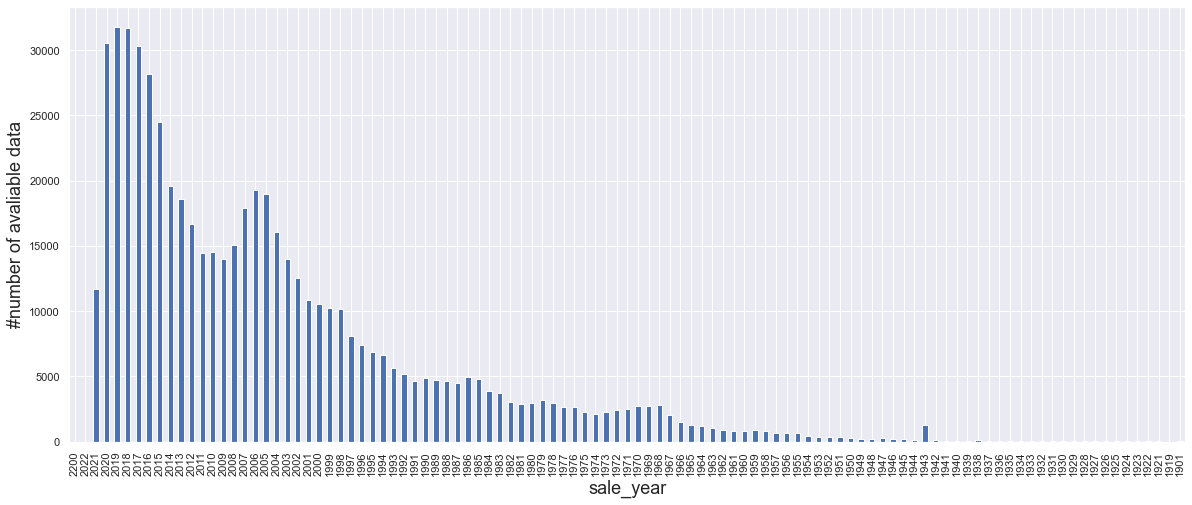

In [7]:
import datetime
pd.set_option("display.max_rows", None)
# data of sale for each year 
pd.to_datetime(data['sale_date']).dt.year.astype('Int64').value_counts().sort_index(ascending=False).plot(kind='bar',figsize=(20,8))

plt.xlabel('sale_year',fontsize=18)
plt.ylabel('#number of avaliable data',fontsize=18)
plt.show()                                                                                                          

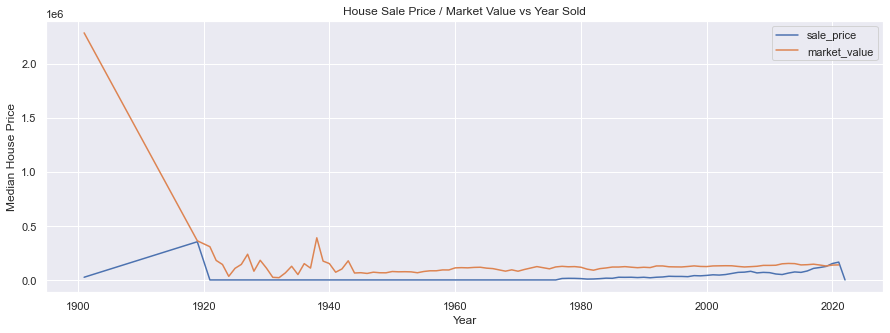

In [30]:
# median house price VS sale_data, built_date
# drop rows with outlier year 2200

# 1. sale_year
data['sale_year'] = pd.to_datetime(data['sale_date']).dt.year.astype('Int64')
data = data.drop(data[data.sale_year>2022].index)
data.groupby('sale_year')['sale_price'].median().plot(figsize=(15,5))
data.groupby('sale_year')['market_value'].median().plot()
plt.xlabel('Year')
plt.ylabel('Median House Price')
plt.title("House Sale Price / Market Value vs Year Sold")
plt.legend(['sale_price', 'market_value'])
plt.show()

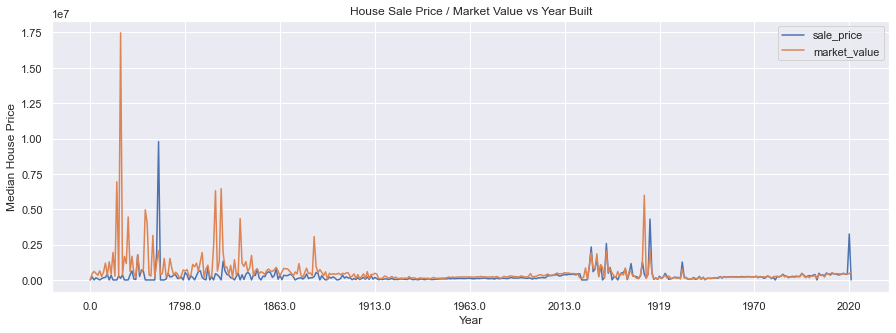

In [31]:
# 2. built_year
# drop outlier 196Y
data = data.drop(data.index[data['year_built'] == '196Y'])
data.groupby('year_built')['sale_price'].median().plot(figsize=(15,5))
data.groupby('year_built')['market_value'].median().plot()
# plt.ticklabel_format(useOffset = False)

plt.xlabel('Year')
plt.ylabel('Median House Price')
plt.title("House Sale Price / Market Value vs Year Built")
plt.legend(['sale_price', 'market_value'])
plt.show()

Note: 
- consider the avaliable data for each year, we only analyze sale price between year 2010--2020
- Remember to delete outlier year 2200

###  `category_code_description`

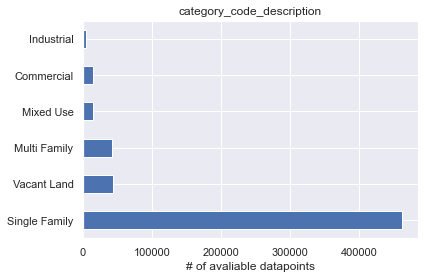

In [8]:
data.category_code_description.value_counts().plot(kind='barh')
plt.title('category_code_description')
plt.xlabel('# of avaliable datapoints')
plt.show()

- Single-Fmaily, Vacant Land and Multi-Fmaily took majority of data 

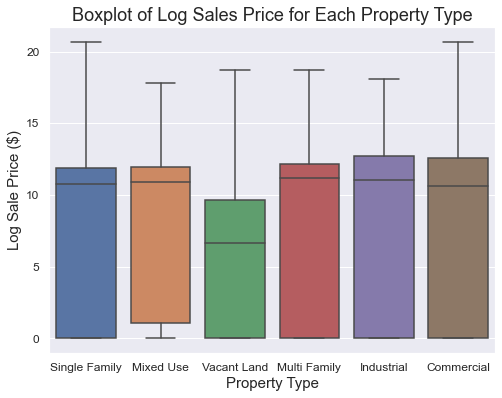

In [9]:
#box plot overallqual/salePrice
var = 'category_code_description'
price_type_analysis = pd.concat([data['sale_price'], data[var]], axis=1)
f, ax =plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y=np.log(price_type_analysis['sale_price']), data=price_type_analysis)
# fig.axis(ymin=1000, ymax=5000000)

plt.title('Boxplot of Log Sales Price for Each Property Type',fontsize=18)
plt.xlabel('Property Type', fontsize=15)
plt.ylabel('Log Sale Price ($)', fontsize=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

Note:
- each categories has sale_price of 0, which is unreasonable. We need to set a price range to extract reasonable datapoints.     

### After Data preprocessing:

In [10]:
All_data_EDA = pd.read_csv('All_data_EDA.csv')
All_data_EDA.head()

,Unnamed: 0,basements,category_code_description,central_air,depth,exterior_condition,fireplaces,frontage,garage_spaces,garage_type,geographic_ward,house_number,interior_condition,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,sale_price,site_type,street_designation,topography,total_area,total_livable_area,type_heater,view_type,zip_code,lat,lng,sale_year,sale_month,sale_week,sale_dow,age,bath_total_ratio,bed_total_ratio,livable_area_ratio
0,0,full,Single Family,Y,94.00000,new,NaN,16.00000,NaN,NaN,29.00000,South or West,new,NaN,3.00000,10.00000,1.00000,263000.00000,NaN,ST,F,1542.00000,1242.00000,A,NaN,19121.00000,-75.17421,39.97913,2021,8,1,4,3.00000,NaN,0.30000,0.80545
1,1,None,Single Family,Y,0.00000,above average,0.00000,0.00000,0.00000,NaN,8.00000,North or East,above average,0.00000,0.00000,NaN,1.00000,272500.00000,NaN,ST,F,0.00000,524.00000,NaN,C,19103.00000,-75.17042,39.94925,2021,7,3,4,122.00000,NaN,NaN,0.97561
2,2,NaN,Single Family,Y,50.00000,new,NaN,NaN,NaN,NaN,31.00000,South or West,new,2.00000,3.00000,NaN,3.00000,655000.00000,NaN,AVE,F,800.00000,2499.00000,A,I,19125.00000,-75.12889,39.97867,2021,7,1,1,2.00000,NaN,NaN,3.12375
3,3,full,Single Family,Y,109.00000,new,0.00000,80.00000,NaN,NaN,21.00000,South or West,new,2.00000,3.00000,6.00000,2.00000,605950.00000,NaN,AVE,F,8219.00000,2716.00000,A,I,19128.00000,-75.23504,40.04562,2021,8,2,1,1.00000,0.33333,0.50000,0.33045
4,10,full,Single Family,Y,112.00000,new,0.00000,82.00000,NaN,NaN,21.00000,South or West,new,2.00000,3.00000,6.00000,2.00000,574380.00000,NaN,AVE,F,6424.00000,2716.00000,A,I,19128.00000,-75.23566,40.04581,2021,8,2,0,1.00000,0.33333,0.50000,0.42279


In [11]:
All_data_EDA.category_code_description.unique()

array(['Single Family', 'Commercial', 'Multi Family', 'Mixed Use',
       'Vacant Land', 'Industrial', nan], dtype=object)

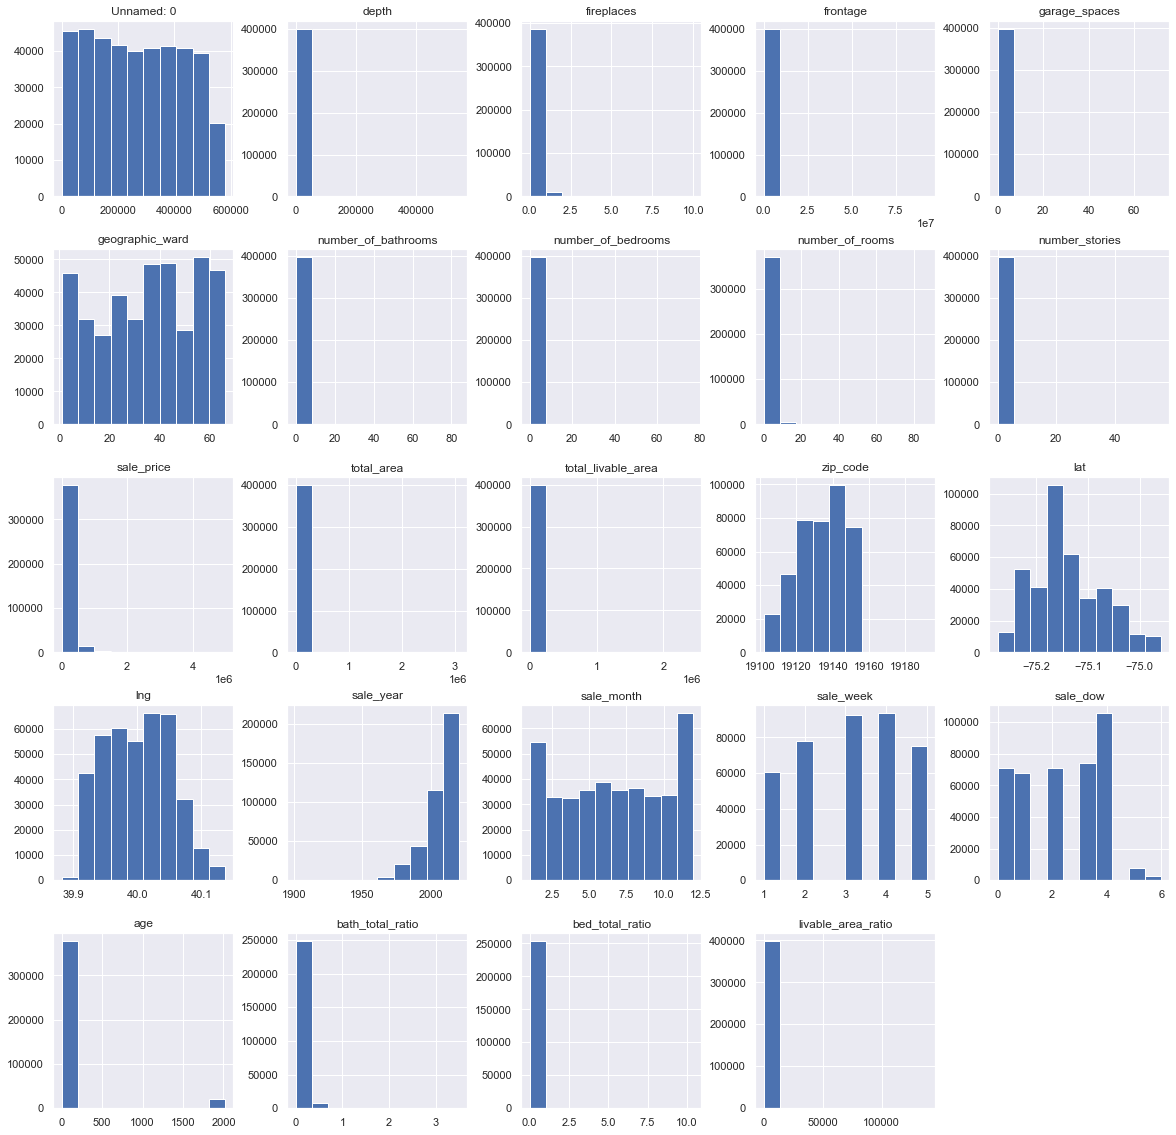

In [12]:
All_data_EDA.hist(figsize=(20,20))
plt.show()

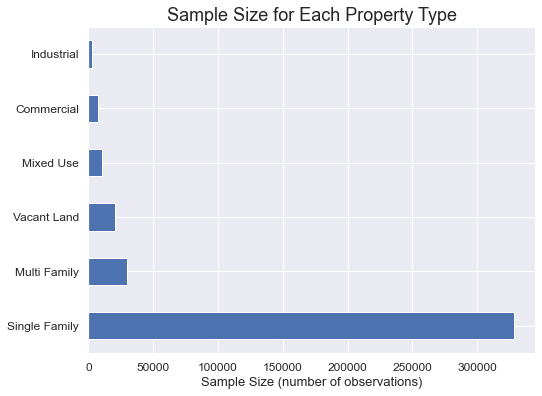

In [13]:
All_data_EDA.category_code_description.value_counts().plot(kind='barh',figsize=(8,6))
plt.title('Sample Size for Each Property Type',fontsize=18)
plt.xlabel('Sample Size (number of observations)', fontsize=13)
plt.yticks(size=12)
plt.xticks(size=12)

plt.show()

In [14]:
All_data_EDA.sale_year.unique()

array([2021, 2020, 2018, 2019, 2004, 2013, 2015, 2017, 1969, 2009, 2016,
       2005, 2000, 2010, 2011, 1970, 2012, 2014, 1973, 1990, 1919, 2002,
       1995, 2007, 2008, 2006, 1991, 1901, 1984, 2001, 1971, 1942, 1998,
       2003, 1996, 1997, 1999, 1992, 1994, 1986, 1987, 1989, 1950, 1985,
       1993, 1988, 1983, 1975, 1981, 1977, 1980, 1978, 1959, 1979, 1982,
       1963, 1964, 1976, 1956, 1957, 1945, 1968, 1972, 1960, 1974, 1967,
       1966, 1965, 1955, 1962, 1961, 1958, 1943, 1946, 1940, 1928, 1935,
       1923, 1927, 1947, 1944, 1938, 1926, 1941, 1937, 1929, 1949, 1953,
       1952, 1951, 1954, 1948], dtype=int64)

In [15]:
All_data_EDA.sale_price.min()

1001.0

In [16]:
All_data_EDA.sale_price.max()

4998000.0

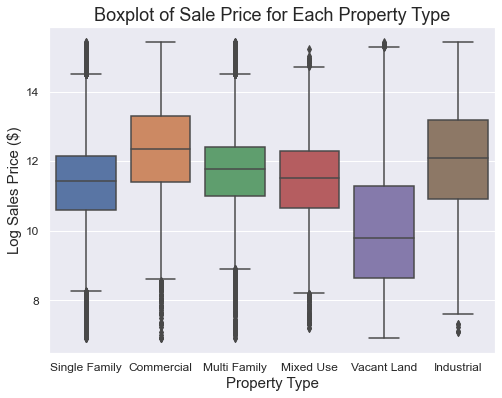

In [17]:
#box plot overallqual/salePrice
var2 = 'category_code_description'
price_type_analysis2 = pd.concat([All_data_EDA['sale_price'], All_data_EDA[var2]], axis=1)

f, ax =plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var2, y=np.log(price_type_analysis2['sale_price']), data=price_type_analysis2)
# fig.axis(ymin=1000, ymax=5000000)

plt.title('Boxplot of Sale Price for Each Property Type',fontsize=18)
plt.xlabel('Property Type', fontsize=15)
plt.ylabel('Log Sales Price ($)', fontsize=15)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

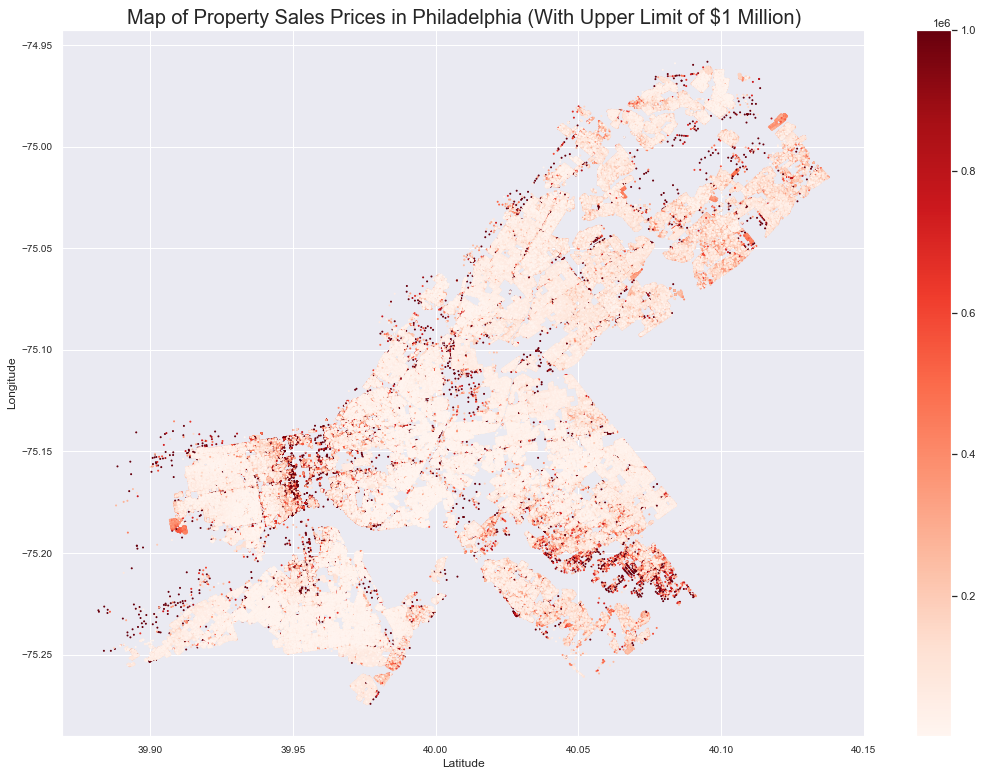

In [18]:
df_maxVal = All_data_EDA.copy()
#set upper limit
maxVal = 1000000
df_maxVal['sale_price'] = df_maxVal['sale_price'].where(df_maxVal['sale_price'] <= maxVal, maxVal) 

plt.figure(figsize=(18,13))
plt.scatter(x=df_maxVal['lng'], y=df_maxVal['lat'],
            s=1,
            c = df_maxVal['sale_price'],
            cmap="Reds")
plt.colorbar()
plt.title("Map of Property Sales Prices in Philadelphia (With Upper Limit of $1 Million)", fontsize=20)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Longitude", fontsize=12)
plt.yticks(size=10)
plt.xticks(size=10)
plt.show()
#color maps: https://matplotlib.org/3.5.1/tutorials/colors/colormaps.html

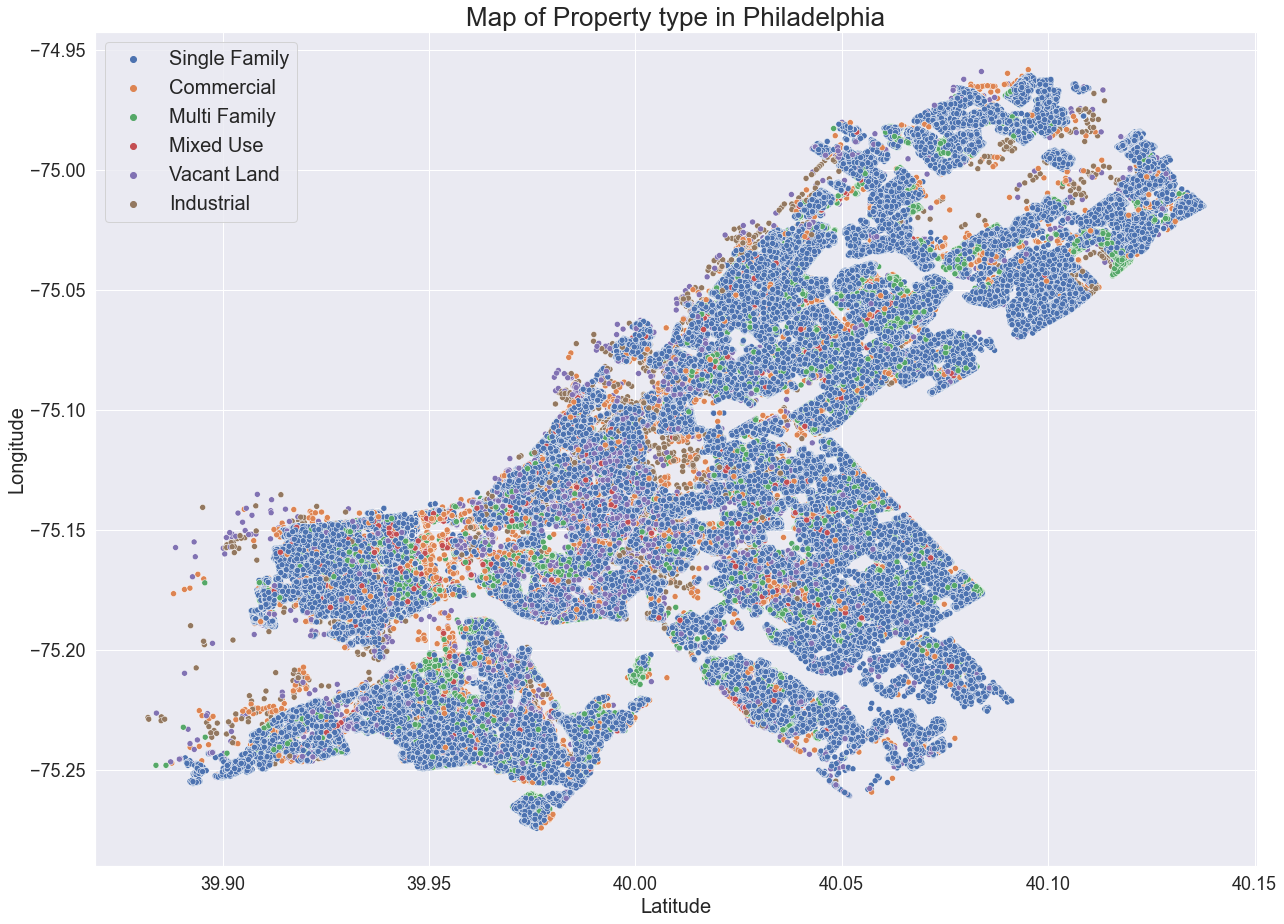

In [19]:
Geoplot_subdata = All_data_EDA.copy()

plt.figure(figsize=(18,13))
sns.scatterplot(data=Geoplot_subdata, x="lng", y="lat", hue="category_code_description")

plt.title("Map of Property type in Philadelphia", fontsize=26)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Longitude", fontsize=20)
plt.yticks(size=18)
plt.xticks(size=18)
plt.legend(loc=2, prop={'size': 20})

plt.tight_layout()
plt.show()

### Boxplot with price for each type

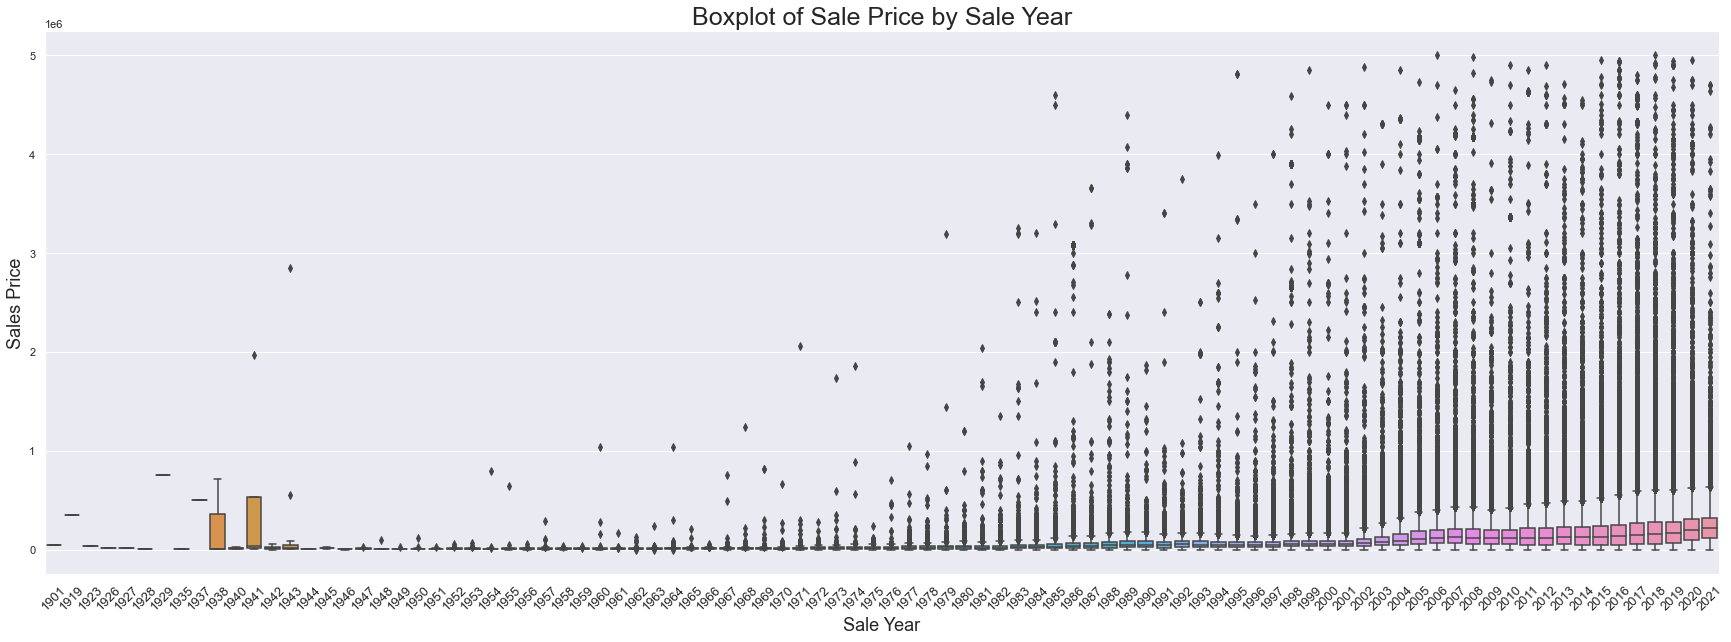

In [20]:
# sale price vs year 
var  = 'sale_year'
analysis = pd.concat([All_data_EDA['sale_price'], All_data_EDA[var]], axis =1)
f, ax = plt.subplots(figsize=(30, 10))
fig = sns.boxplot(x=var, y='sale_price', data=analysis)

plt.xlabel("Sale Year", fontsize=18)
plt.ylabel("Sales Price", fontsize=18)
plt.title("Boxplot of Sale Price by Sale Year", fontsize =25)
plt.xticks(rotation=45)
plt.xticks(size=13)
plt.show()  

### Boxplot Log sale price & sale year for each type

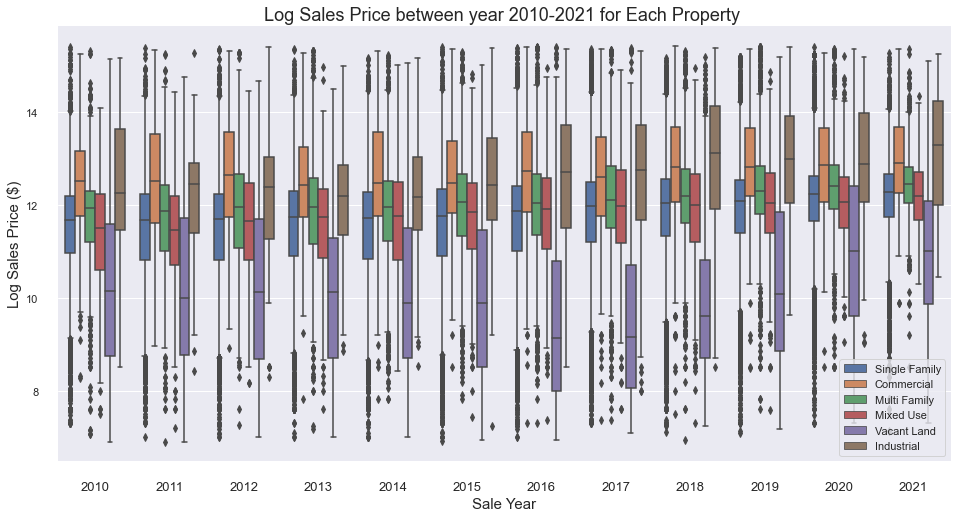

In [21]:
## sort for:
# 1. sale price & sale year from 2010--2021
# 2. different type 
from matplotlib.ticker import FormatStrFormatter

df = All_data_EDA.copy()
sale_19_21 = df.loc[df['sale_year'] > 2009]

analysis = pd.concat([df[['sale_price','category_code_description']], sale_19_21['sale_year']], axis=1)


f, ax = plt.subplots(figsize=(16, 8))
# fig = sns.boxplot(x='sale_year', y='sale_price',
#                   hue='category_code_description',
#                   data=analysis)

fig = sns.boxplot(x='sale_year', y=np.log(analysis['sale_price']),
                  hue='category_code_description',
                  data=analysis)

# fig = sns.boxplot(x=var2, y=np.log(price_type_analysis2['sale_price']), data=price_type_analysis2)
# fig.axis(ymin=1000, ymax=5000000)
# fig.set_yscale("log")
sns.despine(offset=10, trim=True)
plt.xticks(np.arange(12),['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021'])
plt.xlabel("Sale Year", fontsize=15)
plt.ylabel("Log Sales Price ($)", fontsize=15)
plt.title("Log Sales Price between year 2010-2021 for Each Property ", fontsize =18)
plt.xticks(rotation=0)
plt.xticks(size=13)
plt.legend(loc=4)
# plt.xticks(ticks=strings_ticks)
# fig.xaxis.set_major_formatter(FormatStrFormatter('%d'))
plt.show()    


Note: data is really poor and are not well-described by a normal distribution

In [22]:
df = All_data_EDA.copy()
df.category_code_description.unique()

array(['Single Family', 'Commercial', 'Multi Family', 'Mixed Use',
       'Vacant Land', 'Industrial', nan], dtype=object)

### Sale price distribution 

<Figure size 1080x576 with 0 Axes>

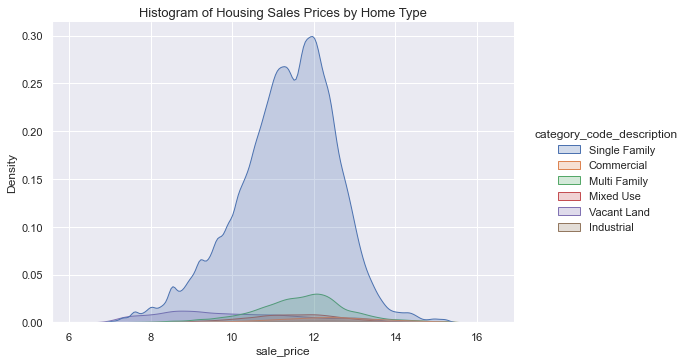

In [23]:
plt.figure(figsize=(15,8))

ax = sns.displot(data=df, x=np.log(df['sale_price']), hue='category_code_description', kind='kde', fill=True, height=5, aspect=1.5)
# ax.set_xscale('log')

# plt.xlabel("Housing Sales Prices", size=13)
# plt.ylabel("Count", size=13)
# plt.xticks(fontsize=13)
# plt.yticks(fontsize=13)
plt.title("Histogram of Housing Sales Prices by Home Type", fontsize = 13)
# plt.legend(loc='upper right', fontsize = 13)
plt.show()

### Detail analysis on # bedrooms/ bethrooms/rooms/stories

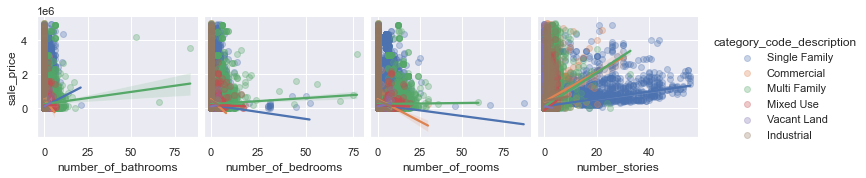

In [24]:
plt.rcParams['figure.figsize']=20,8
sns.pairplot(data=df,hue='category_code_description',
             x_vars=['number_of_bathrooms', 
                   'number_of_bedrooms', 
                   'number_of_rooms', 
                   'number_stories'],
             y_vars=['sale_price'],kind='reg',
             plot_kws={'scatter_kws':{'alpha':0.3}})
plt.show()


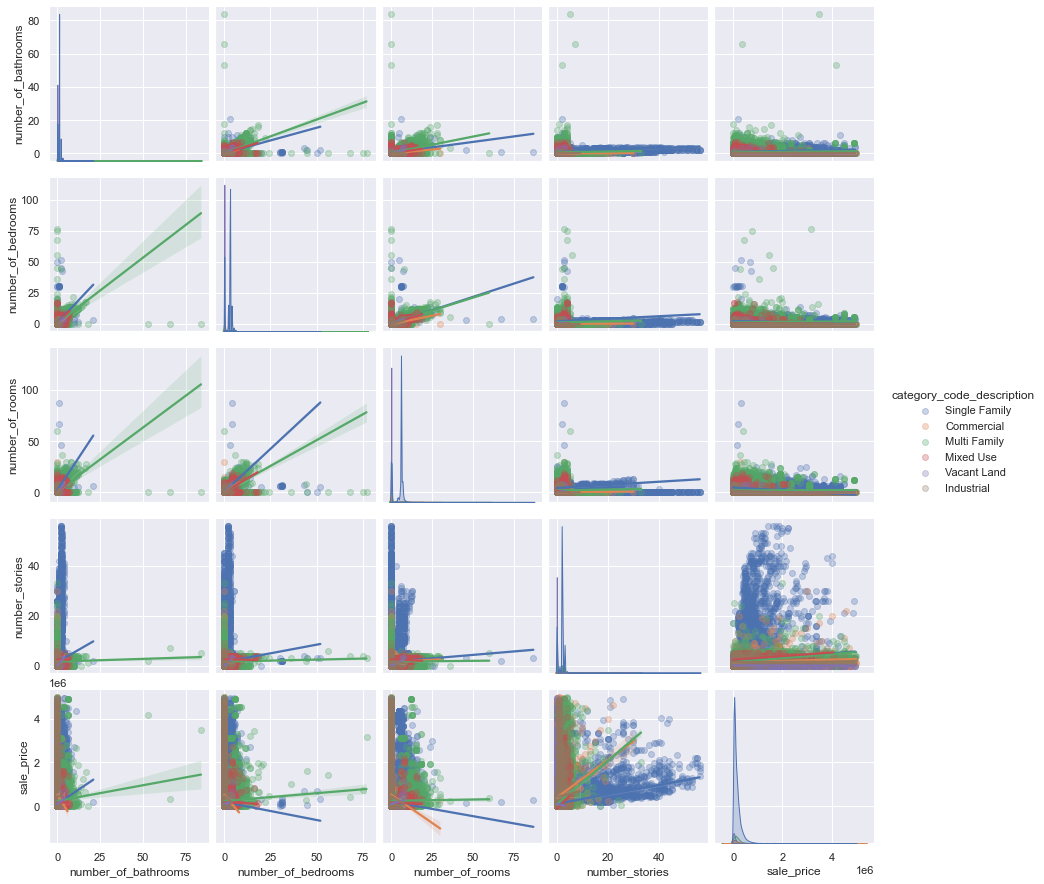

In [25]:
plt.rcParams['figure.figsize']=20,8
sns.pairplot(data=df,hue='category_code_description',
             vars=['number_of_bathrooms', 
                   'number_of_bedrooms', 
                   'number_of_rooms', 
                   'number_stories',
                   'sale_price'],kind='reg',
             plot_kws={'scatter_kws':{'alpha':0.3}})
plt.show()

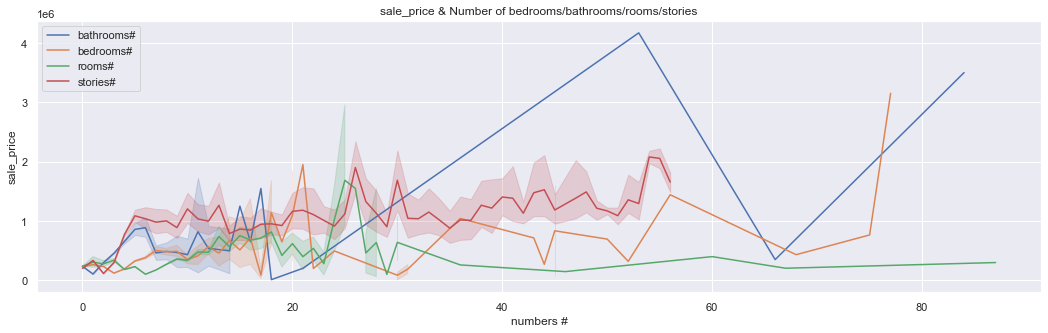

In [47]:
# BARPLOT BETWEEN NUMBER OF BEDROOMS AND PRICES
# sns.set_style("ticks")

plt.figure(figsize=(18,5))
sns.lineplot(x='number_of_bathrooms',y='sale_price',data=All_data_EDA,label='bathrooms#')
sns.lineplot(x='number_of_bedrooms',y='sale_price',data=All_data_EDA,label='bedrooms#')
sns.lineplot(x='number_of_rooms',y='sale_price',data=All_data_EDA,label='rooms#')
sns.lineplot(x='number_stories',y='sale_price',data=All_data_EDA,label='stories#')

plt.title("sale_price & Number of bedrooms/bathrooms/rooms/stories")
plt.xlabel('numbers #')
plt.legend()
# plt.legend(['bathrooms#', 'bedrooms#','rooms#','stories#'])
plt.show()


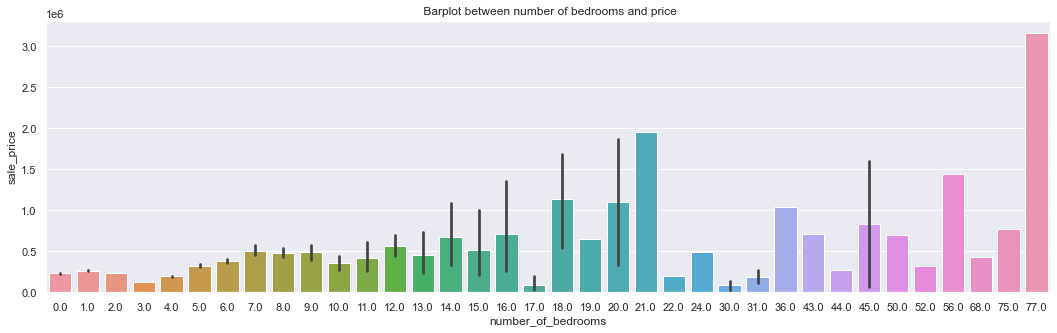

In [28]:
# BARPLOT BETWEEN NUMBER OF BEDROOMS AND PRICES
plt.figure(figsize=(18,5))
sns.barplot(x='number_of_bedrooms',y='sale_price',data=All_data_EDA)
plt.title(" Barplot between number of bedrooms and price")
plt.show()

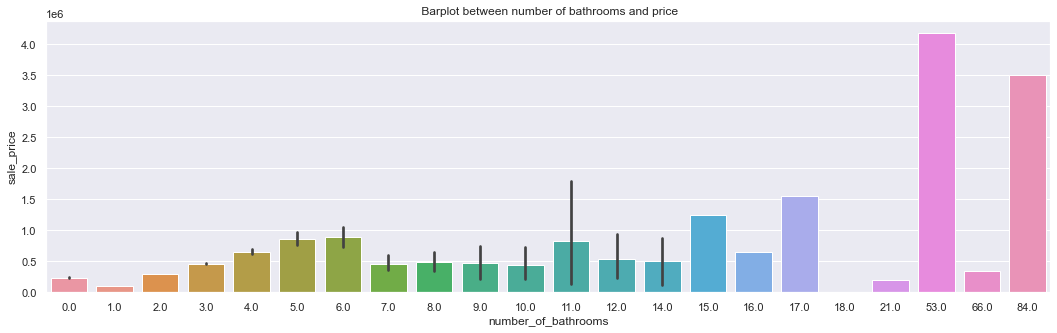

In [42]:
plt.figure(figsize=(18,5))
sns.barplot(x='number_of_bathrooms',y='sale_price',data=All_data_EDA)
plt.title(" Barplot between number of bathrooms and price")
plt.show()

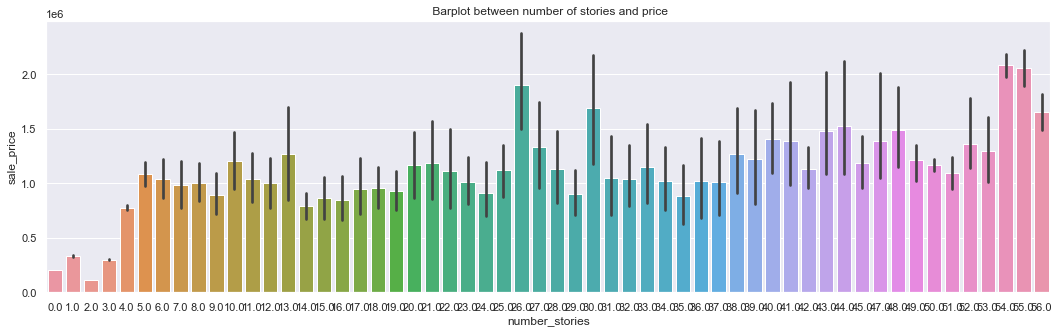

In [43]:
plt.figure(figsize=(18,5))
sns.barplot(x='number_stories',y='sale_price',data=All_data_EDA)
plt.title(" Barplot between number of stories and price")
plt.show()

### Categorical features #available data for each type

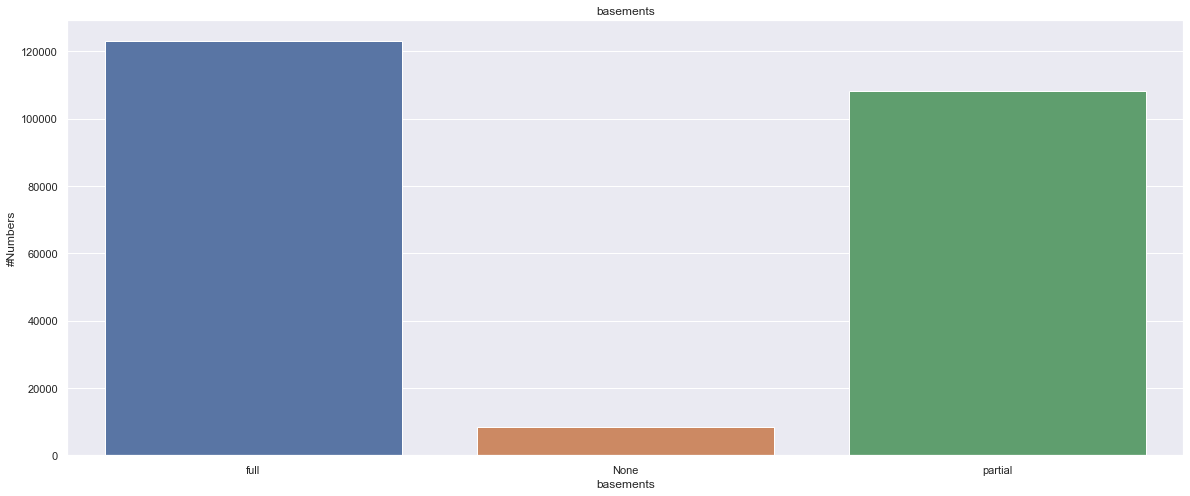

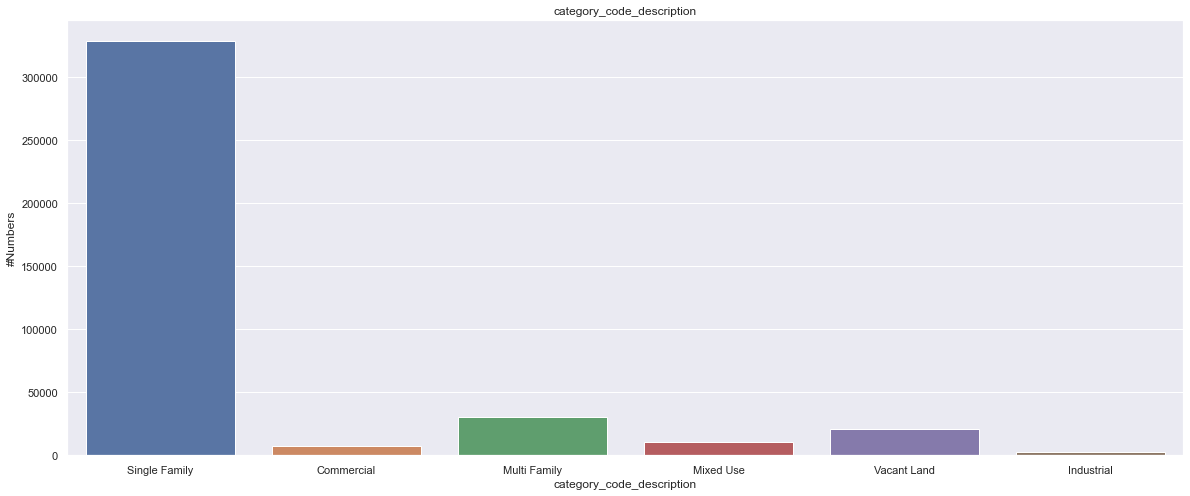

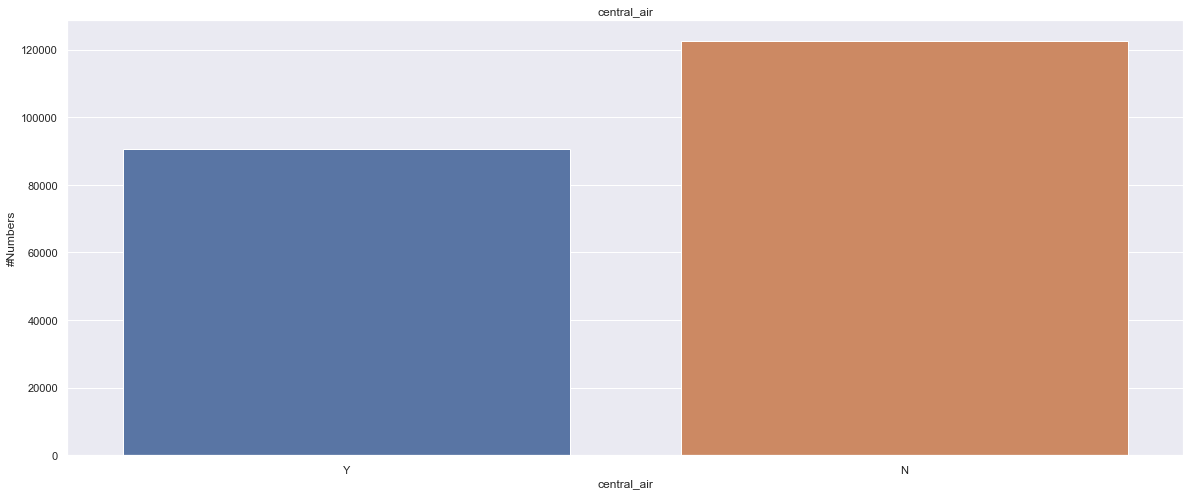

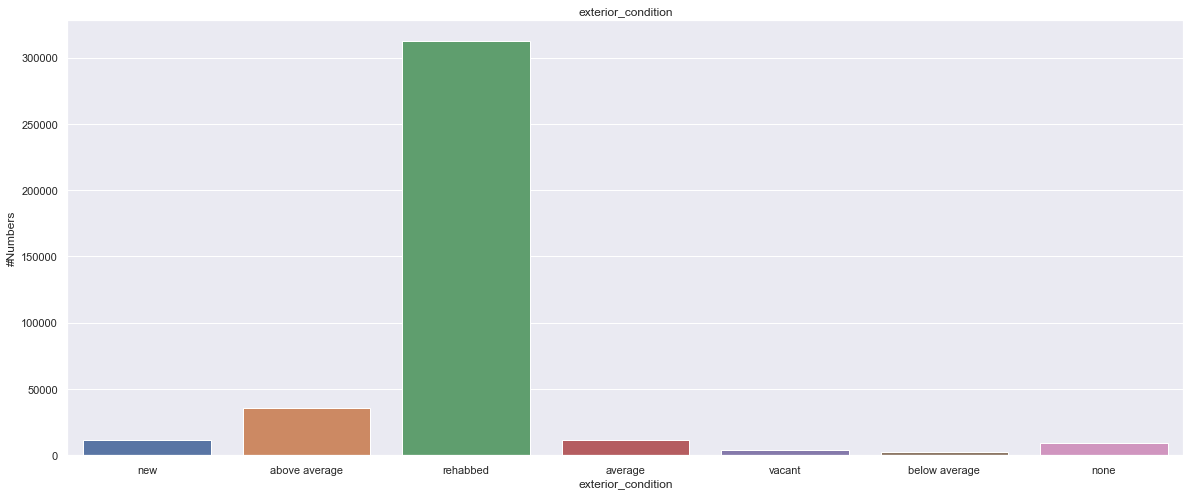

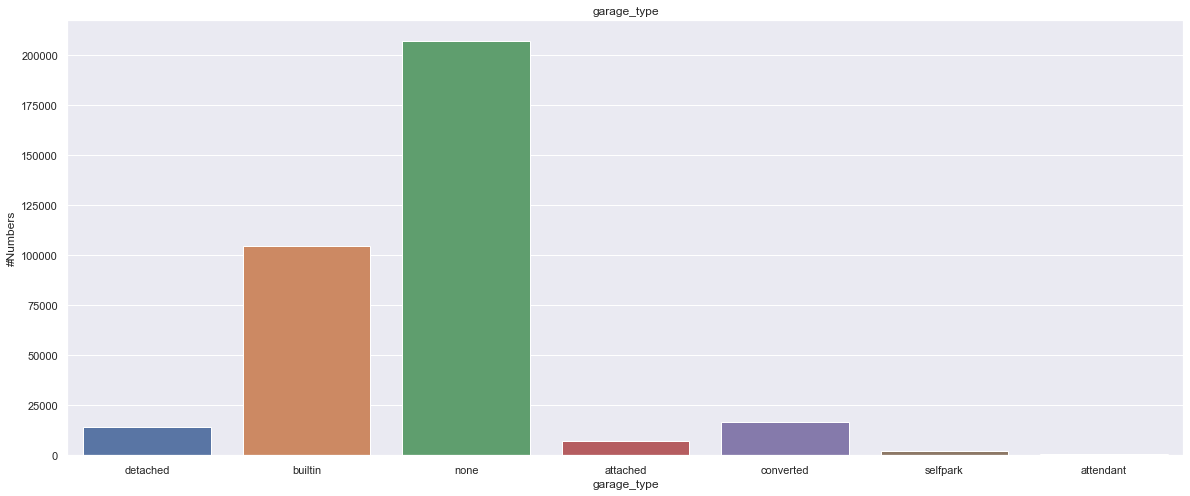

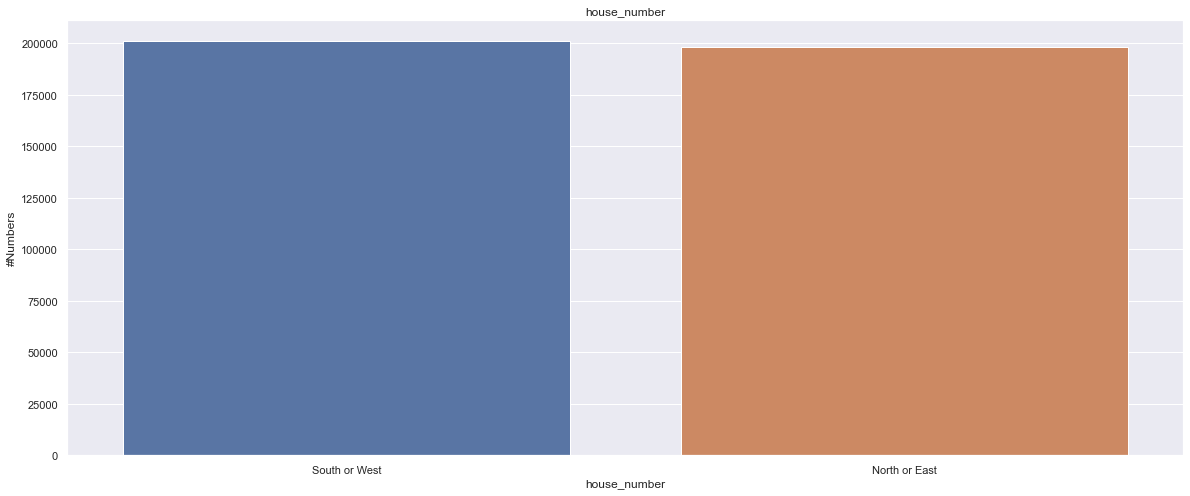

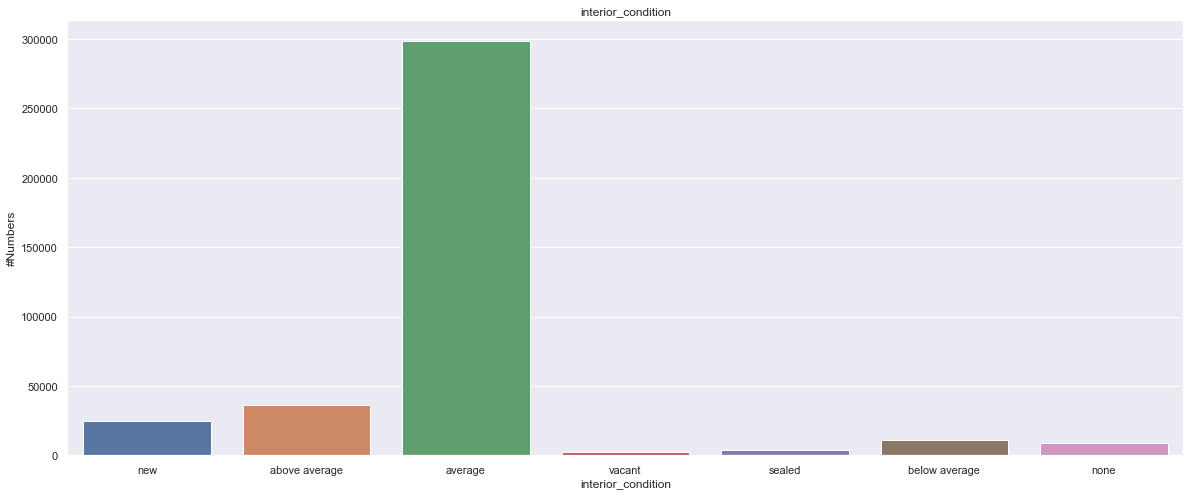

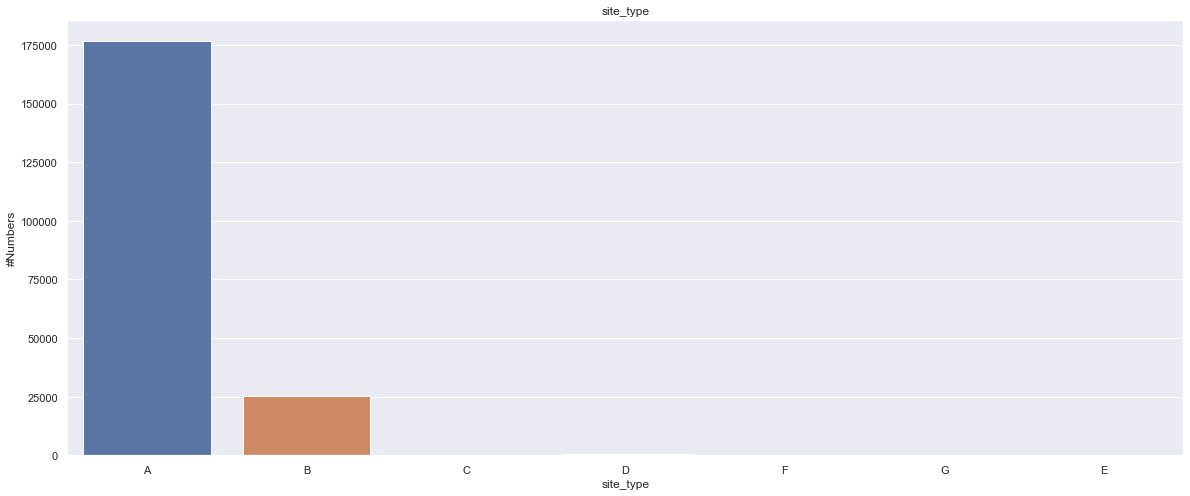

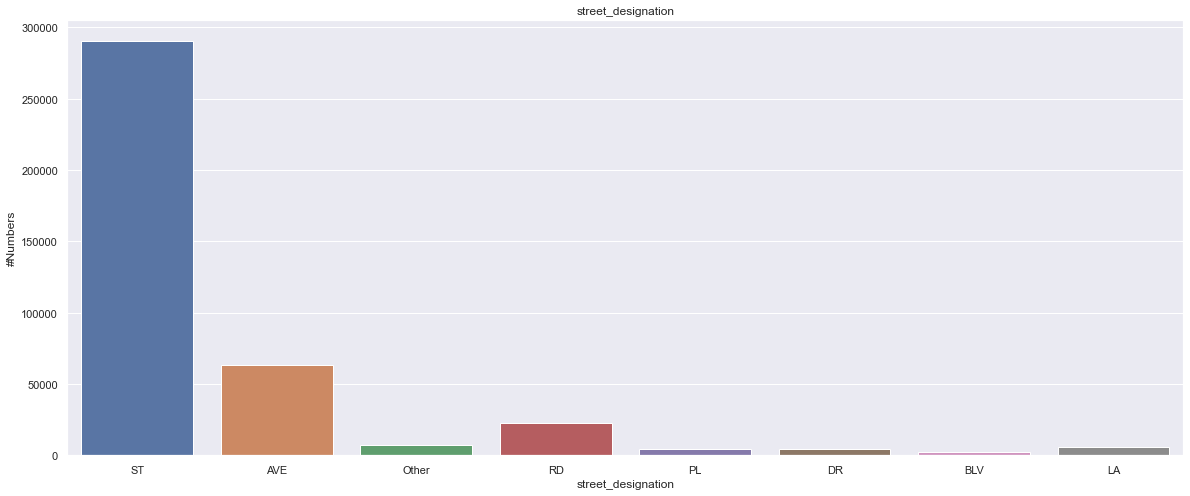

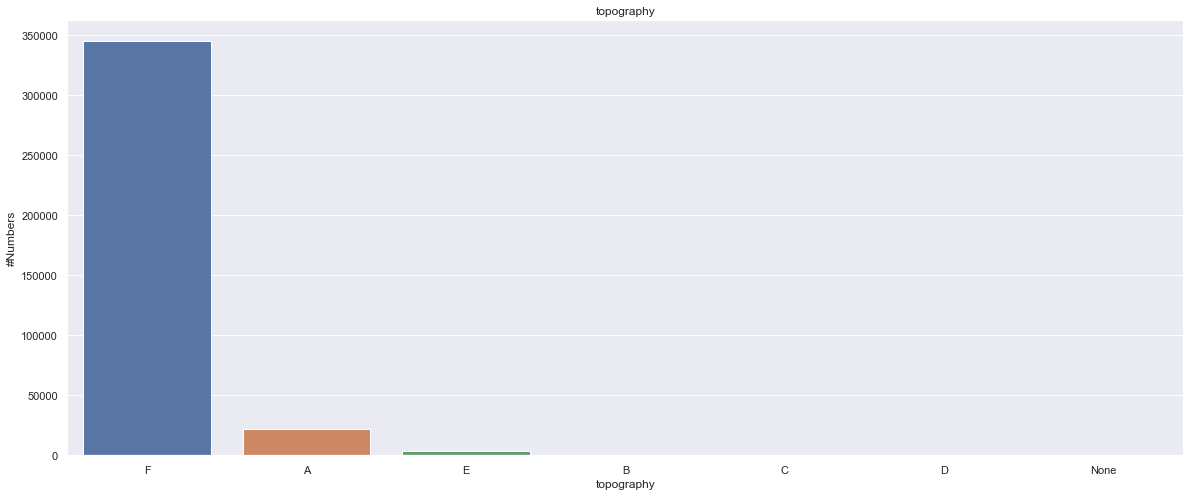

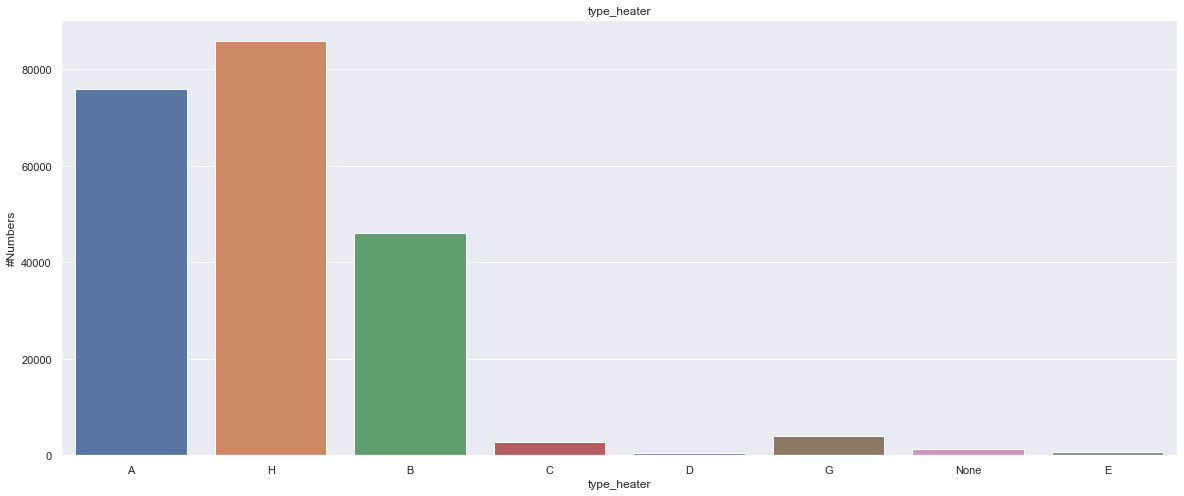

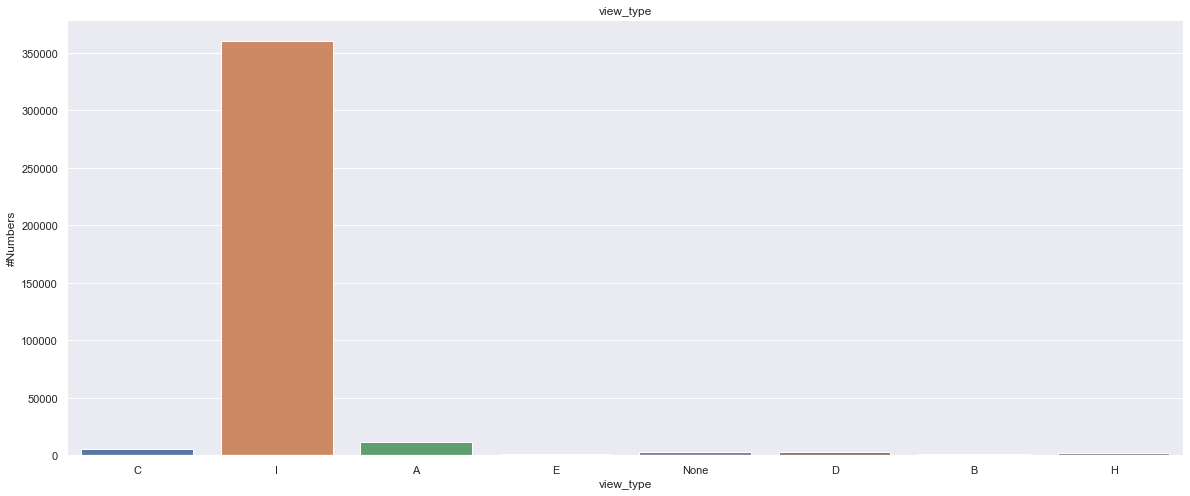

In [29]:
cat_features = ['basements', 'category_code_description', 'central_air', 'exterior_condition', 'garage_type', 
                'house_number','interior_condition', 'site_type','street_designation', 'topography', 
                'type_heater', 'view_type']

for feature in cat_features:
    plt.figure(figsize)
    ax = sns.countplot(x=feature, data=All_data_EDA)
    #ax.set_title(f'number for each categories in {feature}')
    ax.set_title(feature)
    plt.xlabel(feature)
    plt.ylabel('#Numbers')
    plt.show()